# Create the plot for figure 1

Imports and list of steps

In [18]:
import pickle
import os
from numpy import mean
import matplotlib.pyplot as plt
from numpy import argmax

x_value = [i * (1_000_000/240) for i in range(30)]

[0.0,
 4166.666666666667,
 8333.333333333334,
 12500.0,
 16666.666666666668,
 20833.333333333336,
 25000.0,
 29166.666666666668,
 33333.333333333336,
 37500.0,
 41666.66666666667,
 45833.333333333336,
 50000.0,
 54166.66666666667,
 58333.333333333336,
 62500.00000000001,
 66666.66666666667,
 70833.33333333334,
 75000.0,
 79166.66666666667,
 83333.33333333334,
 87500.0,
 91666.66666666667,
 95833.33333333334,
 100000.0,
 104166.66666666667,
 108333.33333333334,
 112500.00000000001,
 116666.66666666667,
 120833.33333333334]

Prepare Baseline

In [16]:
baseline = {}

path = '/home/alsch/Desktop/ML Reproducibillity Chellange/figure_1/0_baseline'

for file in os.listdir(path):
    if file.endswith('.pickle'):
        with open(os.path.join(path, file), 'rb') as f:
            data = pickle.load(f)
            baseline[file.split('_')[2]] = data

baseline_mean = []
for key in baseline.keys():
    baseline_mean.append(baseline[key]['accuracy'])

baseline_mean = list(mean(baseline_mean, axis=0))
baseline_max = argmax(baseline_mean)

29

Prepare Target

In [17]:
target = {}
path = '/home/alsch/Desktop/ML Reproducibillity Chellange/figure_1/2_target'

for file in os.listdir(path):
    if file.endswith('.pickle'):
        with open(os.path.join(path, file), 'rb') as f:
            data = pickle.load(f)
            target[file.split('_')[2]] = data

target_mean = []
for key in target.keys():
    target_mean.append(target[key]['accuracy'])
target_mean = list(mean(target_mean, axis=0))
target_max = argmax(target_mean>=baseline_max)

3

Create the plot

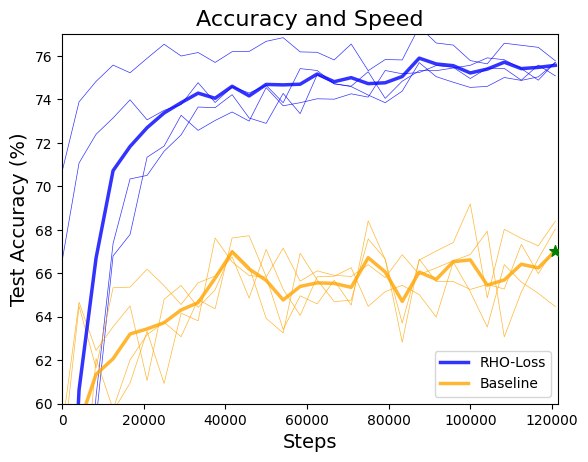

In [12]:
plt.plot(x_value, target_mean, linewidth='2.5', alpha=0.8, color='blue', zorder=5)
plt.plot(x_value, baseline_mean, linewidth='2.5', alpha=0.8, color='orange', zorder=5)
plt.ylim(60, 77)
plt.xlim(0, 121500)

for i in target.keys():
    plt.plot(x_value, target[i]['accuracy'], linewidth='0.5', color='blue', alpha=0.8, zorder=1)

for i in baseline.keys():
    plt.plot(x_value, baseline[i]['accuracy'], linewidth='0.5', color='orange', alpha=0.8, zorder=1)

plt.scatter(x_value[baseline_max], baseline_mean[baseline_max], marker='*', color='green', s=72, zorder=10)

plt.xlabel('Steps', fontsize=14)
plt.ylabel('Test Accuracy (%)', fontsize=14)
plt.title('Accuracy and Speed', fontsize=16)
plt.legend(['RHO-Loss', 'Baseline'])
plt.savefig('figure_1.pdf')